# Scoring Removed and Non-Removed Triples Results

The goal of this document is to show my results when I attempted to characterize and seperate removed triples and non-removed triples via the ampligraph package's Knowledge Graph embedding models. The code for generating this results can be found in the "Scoring Removed and Non-Removed Triples Tutorial" document.  

## CPE-CVE Scores

### CPE-CVE Triples Score with Sample Non-Removed Testing Set

In the tutorial, I present an option for the user to either use a sample of non-removed triples as the testing set or use the the entire set of non-removed triples. I present both results here, starting with the sample. The actual values of  precision and F1-score are not reflective of reality, but the graphs are much clearer with the sample.

`CPE to CVE, Scores Best threshold:  -7.4198947` <br>
`CPE to CVE, Scores Rank Precision and recall:  0.10941294100842737 0.5811836115326252` <br>
`CPE to CVE, Scores Rank Best F1-Score:  0.18415674960932804` <br>

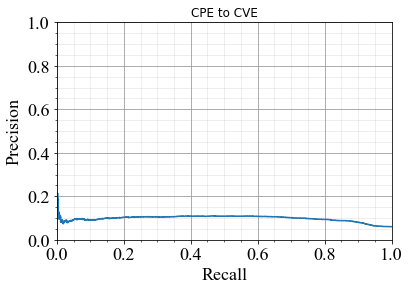

Our threshold tells us is that to optimize the F1-score of the removed triples, we should label cpe-cve triples that score under -6.594101 as removed triples.

As mentioned in the tutorial, if I tried to optimize the F1-score of the non-removed triples, my tests showed that every triple should be labeled as non-removed. This result is supported by the relatively poor precision performance no matter our threshold. We had a lot of false positives where non-removed triples were being labeled removed, suggesting that there were a number of non-removed triples were below the threshold. 

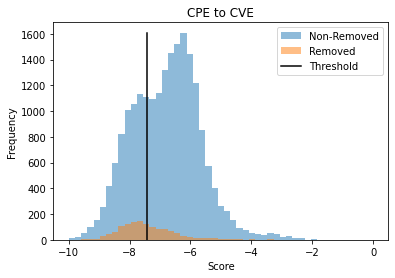

This conclusion is validated by the histogram. We can see that the removed triples do tend to have lower scores and that our threshold does its best to seperate the removed and non-removed triples. This suggests that using TransE's scoring function can somewhat seperate removed and non-removed triples, but doesn't do a great job as there is a lot of overlap between the distrbutions. Thus, I conclude that score can somewhat seperate removed from non-removed triples, but that this method lacks precision and mislabels many non-removed triples as removed.

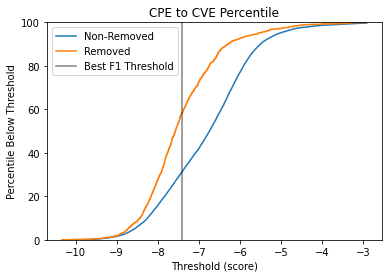

The percentile graphs show the percentile of each type of triple that are below some score. We can observe that removed triples do tend to have lower scores, as the percentile below threshold tends to be higher than non-removed triples. The difference in percentile is significant at certain thresholds, suggesting TransE captures some level of information within the Knowledge Graph that characterizes removed triples differently. This is promising 

### CPE-CVE Triples Score with Entire Non-Removed Testing Set

`CPE to CVE, Scores Best threshold:  -7.455214`<br>
`CPE to CVE, Scores Rank Precision and recall:  0.01197066705178196 0.5660091047040972`<br>
`CPE to CVE, Scores Rank Best F1-Score:  0.023445479830915977`<br>

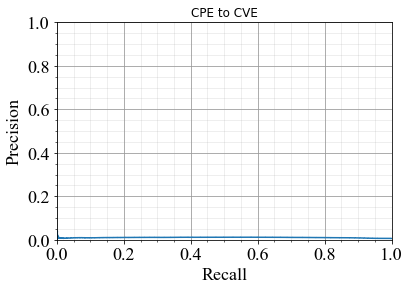

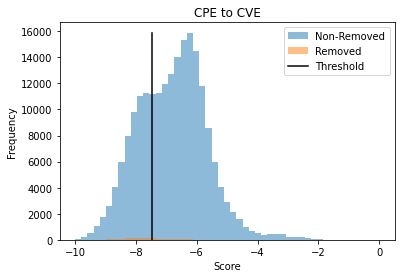

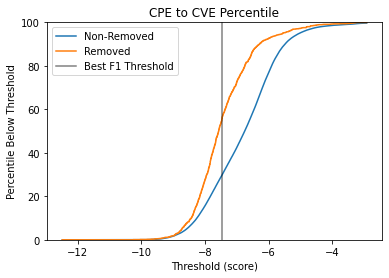

With such a relatively high number of non-removed triples, our absolute performance for optimizing the precision of removed triples will be extremely poor, leading to a poor f1-score.

That being said, we can see that the score distribution of the removed triples and non-removed triples is very similiar here. We also obtained a very similiar threshold despite the difference in relative frequencies, confirming that the method does translate to a real testing set.

The percentiles are pretty much identical as expected since percentile is independent from the scale.

### CPE-CVE Triples Score Compared to Artificial Negatives

As mentioned in the tutorial, I wanted to compare how removed triples compared to artificially generated negatives, just to observe. The precision, recall, and F1-score metrics here isn't very meaningful, but I included them regardless for due diligence.

`CPE to CVE, Scores Best threshold:  -9.267201`<br>
`CPE to CVE, Scores Rank Precision and recall:  0.9977672341613173 0.8448540706605223`<br>
`CPE to CVE, Scores Rank Best F1-Score:  0.9149657687631966`<br>

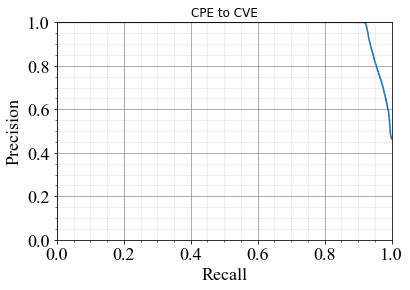

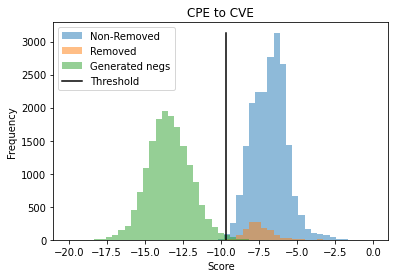

We can see that the generated negative triples tend to have significantly lowers scores than both the removed and non-removed triples. This suggests that removed triples are significantly harder to detect with score compared to a typical negative triple, which is somewhat expected.   

Again, do note that the thresholds and F1-scores here are heavily influenced by the relative frequences of removed triples, generated triples and non-removed triples. This makes our metrics here somewhat arbituary as we can choose how many aritifical negative triples to generate and is why our cwe-cve treshold did not change. 

## CVE-CWE Scores

### CVE-CWE Triples Score with Sample Non-Removed Testing Set

`CWE to CVE, Scores Best threshold:  -6.4873295`<br>
`CWE to CVE, Scores Rank Precision and recall:  0.28450382923252404 0.754863813229572`<br>
`CWE to CVE, Scores Rank Best F1-Score:  0.4132544378698225`<br>

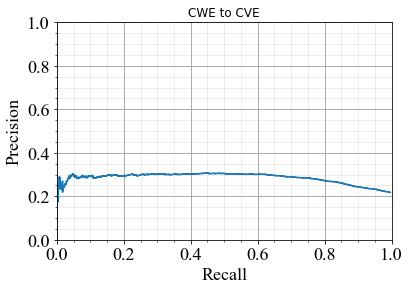

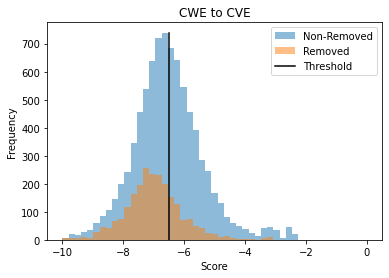

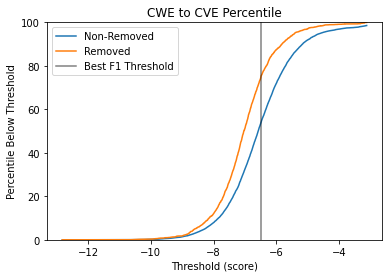

There is a lot of overlap, even more so than CPE-CVE triples as indicated by our percentile graph. that makes it hard to distinguish removed from non-removed. However, there is still a small pattern with removed compared to non-removed.

An interesting observation is that it seems that there as a much larger fraction of CWE-CVE triples that are removed compared to CPE-CVE triples. 

### CVE-CWE Triples Score with Entire Non-Removed Testing Set

`CWE to CVE, Scores Best threshold:  -7.0776663`<br>
`CWE to CVE, Scores Rank Precision and recall:  0.04268199233716475 0.4816255944660614`<br>
`CWE to CVE, Scores Rank Best F1-Score:  0.07841481012212718`<br>

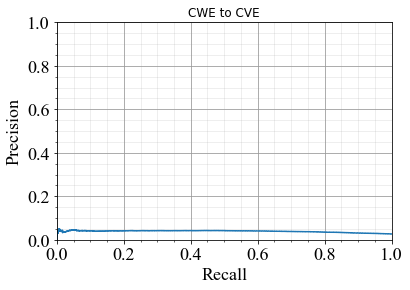

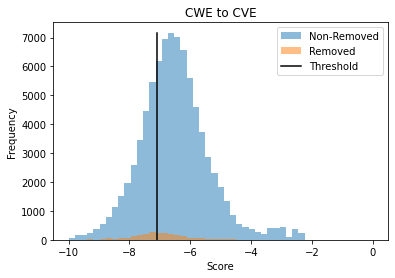

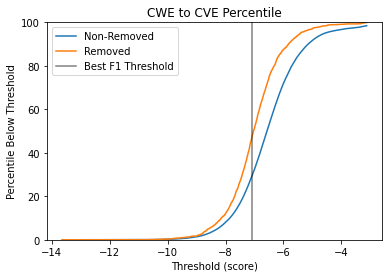

Many of the conclusions from CPE-CVE triples apply here. However, our CWE-CVE threshold did shift more compared to the sample threshold. The threshold in this section is the more accurate one as we are using a more realistic and representative testing set.  

### CPE-CVE Triples Score Compared to Artificial Negatives

`CWE to CVE, Scores Best threshold:  -7.073951` <br>
`CWE to CVE, Scores Rank Precision and recall:  0.504898119122257 0.6830108666843361`<br>
`CWE to CVE, Scores Rank Best F1-Score:  0.5806015545792498`<br>

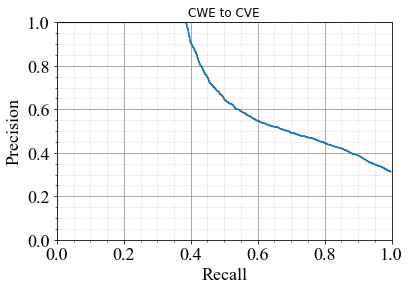

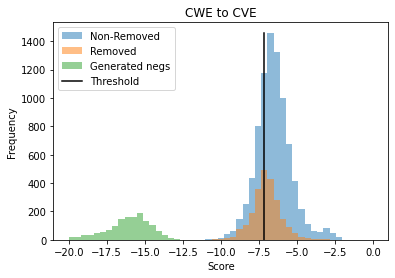

Like with CPE-CVE triples, we can see that artifical negatives seperate themselves quite a bit. Do note again that the precision, recall, and F1-score metrics are not particularly meaningful here.

## Other Notes

### Rank

As mentioned in the tutorial, the same tests can be ran for rank instead of score. That being said, unlike with score, the removed and non-removed triples had almost identical distributions that resulted in extreme thresholds. I give an example histogram below.

My overall conclusions for rank is that both removed and non-removed both tend outperform the generated negatives that the ranking metrics use, and they do so in the same pattern/distrbution. Thus, there is basically no real way to seperate the removed from the non-removed using rank.

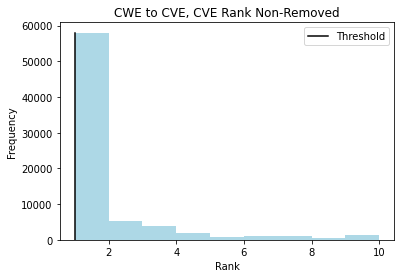

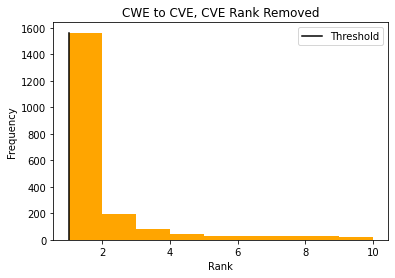

## Other Models

The exact same evaluation method can be applied to any of the ampligraph package's built-in embedding models. Testing with DistMult and ComplEx, TransE had superior performance comapared to those other models and is thus the model I heavily document here.

Potential future work would be to see if embedding models beyond the built-in ampligraph models would result in better performance. However, it is unclear at the moment if the knowledge even has enough information to clearly seperate removed and non-removed triples. There may be a low ceiling to how well we can seperate them with our current knowledge graph, no matter the embedding model. 

## Conclusion

Ultimately, there isn't a metric that can seperate removed and non-removed triples very well. This suggests that either our knowledge graph doesn't have enough information to seperate removed and non-removed triples, or that ampligraph's models can't capture that information.  

Rank was essentially useless as the distrbution of removed and non-removed triples' ranks are close to identical. 

Using score a metric was more promising than rank, notably with the TransE model where we got the most consistent and distinct seperation. The distributions of removed and non-removed triples do follow slighty different patterns but they both still operate in the same general ranges. As a result, our precision is limited but we can still find a threshold that captures as many removed triples as possible while leaving out as many non-removed triples as possible. Thus, our knowledge graph does contain some information that characterizes removed and non-removed differently, and we hope to extract that qualitative information in future works.  

Our actual absolute perormance is still very poor due to the fact that non-removed triples far outnumber removed triples, resulting in terrible precision as it's not really possible to include a high ratio of removed to non-removed. This limits the practicality of any conclusions we may draw, as the liklihood for removal will be tiny no matter what.

